<a href="https://colab.research.google.com/github/strange-hawk/ml_nn/blob/master/nn_prac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
rides = pd.read_csv('https://raw.githubusercontent.com/udacity/deep-learning/master/first-neural-network/Bike-Sharing-Dataset/hour.csv')

In [0]:
dummy_values=['season','weekday','mnth','weathersit','hr']
for d in dummy_values:
  rides = pd.concat([rides,pd.get_dummies(rides[d],prefix=d)],axis=1)
  rides.drop(d,axis=1,inplace=True)

In [0]:
rides.drop(['instant','dteday','atemp','workingday'],axis=1,inplace=True)

**scaling**

In [0]:
for i in ['temp','casual','hum','registered','cnt']:
  mean,std = rides[i].mean(),rides[i].std()
  rides[i] = (rides[i]-mean)/std

In [0]:
test_data=rides[-21*24:]
train = rides[:-21*24]

In [0]:
target_fields= ['cnt','registered','casual']
targets = rides[target_fields]
features = rides.drop(target_fields,axis=1)

In [69]:
features.shape , targets.shape

((17379, 56), (17379, 3))

**splitting the data into train,vaidate dataset**

In [0]:
n_records =  features.shape[0]

In [0]:
split = np.random.choice(a=features.index ,size=int(n_records*0.8), replace=False )
train_features,train_targets = features.iloc[split],targets.iloc[split]
validate_features,vaidate_targets = features.drop(split),targets.drop(split)

In [0]:
def mse(y,Y):
  return np.mean((y-Y)**2)

In [0]:
def sigmoidFunction(x):
  return 1/(1+np.exp(-x))

In [0]:
class NeuralNetwork:
  def __init__(self,input_nodes,hidden_nodes,output_nodes,learning_rate ):
    self.input_nodes = input_nodes
    self.hidden_nodes = hidden_nodes
    self.output_nodes = output_nodes
    self.learning_rate = learning_rate
    self.weights_input_hidden = np.random.normal(loc=0.0, scale=self.hidden_nodes**-0.5,size= (self.input_nodes, self.hidden_nodes))
    self.weights_hidden_output = np.random.normal(loc=0.0, scale=self.output_nodes**-0.5,size= (self.hidden_nodes,self.output_nodes))
    self.learning_rate = learning_rate
    print(self.weights_input_hidden.shape,self.weights_hidden_output.shape)
    self.activation_function = sigmoidFunction
  
  def train(self,features,target):
    n_records=features.shape[0]
    delta_w_i_h = np.zeros(self.weights_input_hidden.shape)
    delta_w_h_o = np.zeros(self.weights_hidden_output.shape)
    for x,y in zip(features,target):
      hidden_input = np.dot(x,self.weights_input_hidden)
      hidden_output = self.activation_function(hidden_input)
      output_in = np.dot(hidden_output,self.weights_hidden_output)
      final_output = self.activation_function(output_in)
      # backpropagation
      error = y - final_output
      output_error_term = error*final_output*(1-final_output)
      hidden_error= np.dot(output_error_term,self.weights_hidden_output.T)
      hidden_error_term = hidden_error*hidden_output*(1.-hidden_output)
      # delta_w_i_h +=  np.outer(x,hidden_error_term)
      delta_w_h_o += np.outer(hidden_output,output_error_term)
      delta_w_i_h +=  np.outer(x,hidden_error_term)

    # weight updation
    self.weights_hidden_output += self.learning_rate*delta_w_h_o/n_records
    self.weights_input_hidden += self.learning_rate*delta_w_i_h/n_records




  def run(self,features):
    hidden_inputs = np.dot(features,self.weights_input_hidden)
    hidden_outputs = self.activation_function(hidden_inputs)
    final_inputs = np.dot(hidden_outputs,self.weights_hidden_output)
    final_output = self.activation_function(final_inputs)

    return final_output


In [77]:
epochs = 3000
learning_rate=0.01
hidden_nodes = 10
output_nodes = 1
N_i = train_features.shape[1]
# print(train_features.index)
network = NeuralNetwork(N_i,hidden_nodes,output_nodes,learning_rate)
losses={'train':[], 'validation':[]}
batch = np.random.choice(train_features.shape[0],size=128,replace=False)
for i in range(epochs):
  record,target = train_features.iloc[batch].values,train_targets.iloc[batch]['cnt']
  network.train(record,target)
  if e%(epochs/10) ==0:
    train_loss = mse(network.run(train_features),train_targets['cnt'].values)
    validation_loss = mse(network.run(validate_features),vaidate_targets['cnt'].values)
    losses['train'].append(train_loss)
    losses['validation'].append(validation_loss)
    print('Training loss: {:.4f}'.format(train_loss))
    print('Validation loss: {:.4f}'.format(validation_loss))
#   network.train(record,target)
# record,target = zip(train_features.iloc[0].values,train_targets.iloc[0]['cnt'])
# print(type(record),target)

# for e in range(epochs):
#   batch = np.random.choice(train_features.shape[0],size=128,replace=False)
#   for record,target in zip(train_features.iloc[batch].values,train_targets.iloc[batch]['cnt']):
#     print(record.shape,target.shape)
#     network.train(record,train)
#   if e%(epochs/10) ==0:
#     train_loss = mse(network.run(train_features),train_targets['cnt'].values)
#     validation_loss = mse(network,run(validate_features),validate_targets['cnt'].values)
#     losses['train'].append(train_loss)
#     losses['validation'].apend(validation_loss)
#     print('Training loss: {:.4f}'.format(train_loss))
#     print('Validation loss: {:.4f}'.format(validation_loss))


Streaming output truncated to the last 5000 lines.
Validation loss: 1.0224
Training loss: 1.0124
Validation loss: 1.0224
Training loss: 1.0124
Validation loss: 1.0224
Training loss: 1.0124
Validation loss: 1.0224
Training loss: 1.0124
Validation loss: 1.0223
Training loss: 1.0123
Validation loss: 1.0223
Training loss: 1.0123
Validation loss: 1.0223
Training loss: 1.0123
Validation loss: 1.0223
Training loss: 1.0123
Validation loss: 1.0223
Training loss: 1.0123
Validation loss: 1.0223
Training loss: 1.0122
Validation loss: 1.0222
Training loss: 1.0122
Validation loss: 1.0222
Training loss: 1.0122
Validation loss: 1.0222
Training loss: 1.0122
Validation loss: 1.0222
Training loss: 1.0122
Validation loss: 1.0222
Training loss: 1.0122
Validation loss: 1.0221
Training loss: 1.0121
Validation loss: 1.0221
Training loss: 1.0121
Validation loss: 1.0221
Training loss: 1.0121
Validation loss: 1.0221
Training loss: 1.0121
Validation loss: 1.0221
Training loss: 1.0121
Validation loss: 1.0221
Train

In [0]:
print(train_features.shape)

(13903, 56)


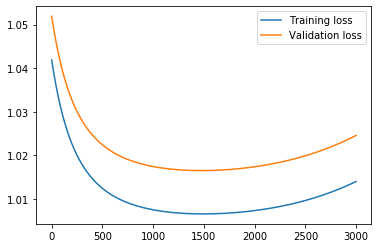

In [78]:
plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()